In [400]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize


In [401]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/training"
dataset_dirs = os.listdir(dataset_path)
cat_file = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/cats.txt"

In [402]:
with open(cat_file, 'r') as f:
    lines = f.readlines()

In [403]:
lines = ["".join(x.strip('\n').split(',')) for x in lines]

In [404]:
lines[0]

'test/14826 trade'

In [405]:
paths = []
cats = []

for line in lines:
    temp_line = line.split(' ')
    paths.append(temp_line[0])
    cats.append(temp_line[1])

In [406]:
paths[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [407]:
counts = pd.Series(cats).value_counts()


In [408]:
counts[:10]

earn            3937
acq             2312
crude            442
interest         424
money-fx         386
trade            377
ship             236
money-supply     160
wheat            149
sugar            136
Name: count, dtype: int64

In [409]:
sum(counts)

10788

In [410]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/"

data = []
split = []

for index, i in tqdm(enumerate(paths)):
    with open(f"{dataset_path}/{i}", 'r') as f:
        content = f.read()
        data.append(content)
        split.append(i.split('/')[0])


1310it [00:00, 13076.19it/s]

10788it [00:00, 13572.14it/s]


In [411]:
set(split)

{'test', 'training'}

In [412]:
data = [article.split('\n ') for article in data]

In [413]:
topics = [article.pop(0) for article in data]

In [414]:
data = ["".join(line) for line in data]

In [415]:
df = pd.DataFrame(list(zip(topics, data, cats, split)),
               columns =['Topic','Text', 'Category', 'Split'])

In [416]:
df.tail()

,Topic,Text,Category,Split
10783,BANK OF JAPAN INTERVENES SOON AFTER TOKYO OPENING,The Bank of Japan bought a small amount of do...,money-fx,training
10784,JAPAN RUBBER STOCKS FALL IN MARCH,"Japan's rubber stocks fell to 44,980 tonnes i...",rubber,training
10785,SOUTH KOREAN WON FIXED AT 25-MONTH HIGH,THE BANK OF KOREA SAID IT FIXED THE MIDRATE O...,money-fx,training
10786,NIPPON MINING LOWERS COPPER PRICE,Nippon Mining Co Ltd said it lowered its sell...,copper,training
10787,AUSTRALIAN UNIONS LAUNCH NEW SOUTH WALES STRIKES,Australian trade unions said they have launch...,ship,training


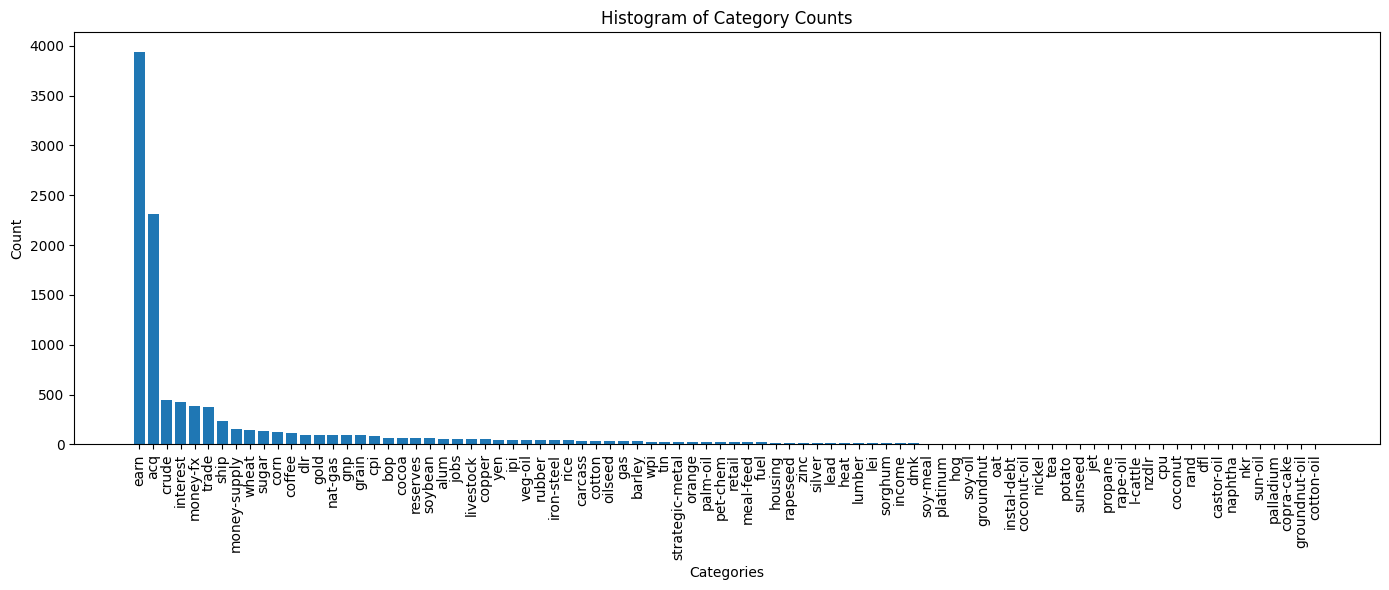

In [417]:
value_counts = df['Category'].value_counts()


plt.figure(figsize=(14, 6))
plt.bar(value_counts.index, value_counts.values)
plt.title('Histogram of Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [418]:
print(f"No of Categories: {len(df['Category'].unique())}")

No of Categories: 86


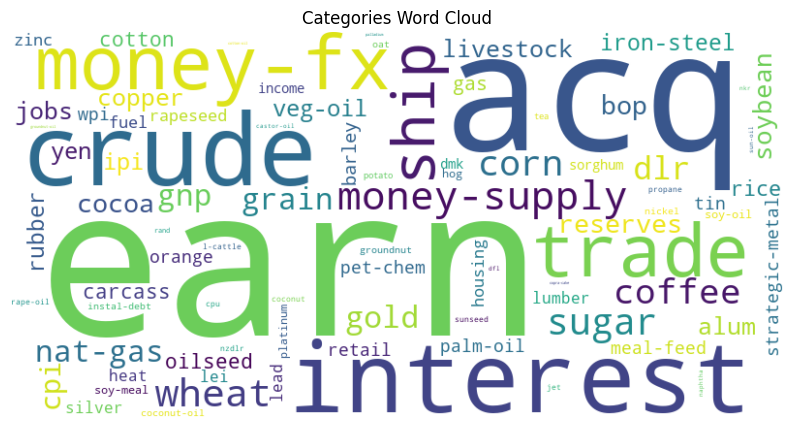

In [419]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Categories Word Cloud')
plt.show()

In [420]:
def count_words(text):
    return len(text.split())

In [421]:
df['WordCount'] = df['Text'].apply(count_words)

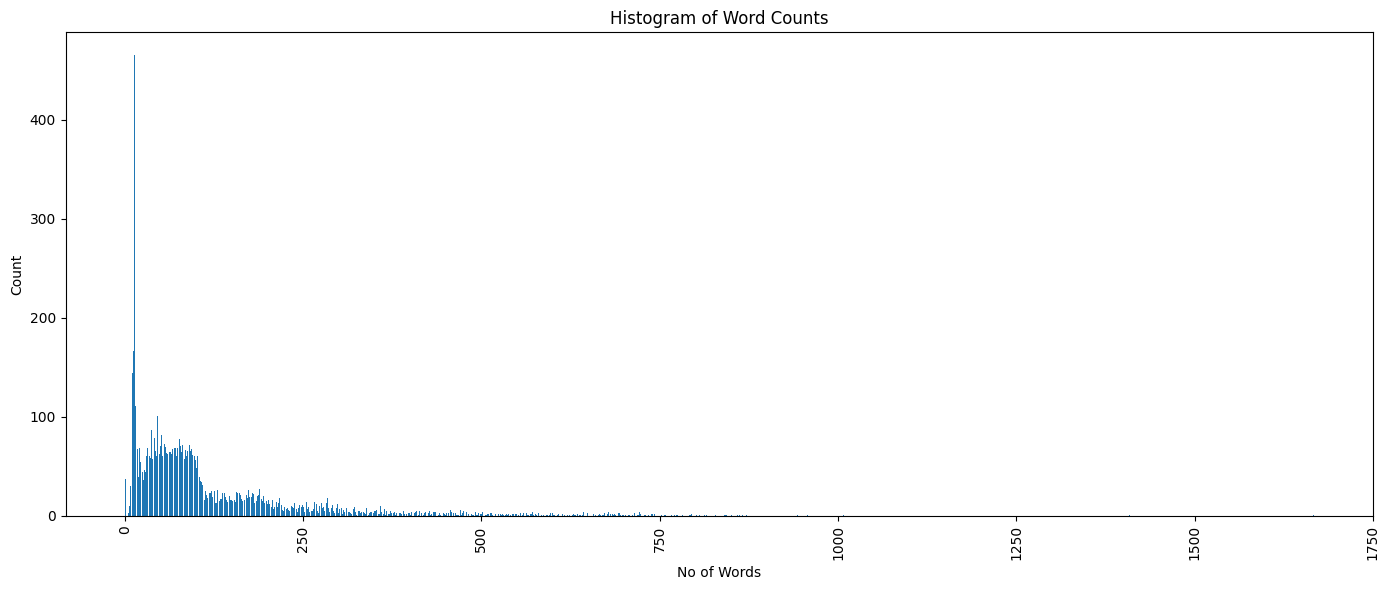

In [422]:
word_counts = df['WordCount'].value_counts()

plt.figure(figsize=(14, 6))
plt.bar(word_counts.index, word_counts.values)
plt.title('Histogram of Word Counts')
plt.xlabel('No of Words')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [423]:
word_counts

WordCount
14     465
13     209
12     166
11     144
16     137
      ... 
628      1
565      1
557      1
719      1
326      1
Name: count, Length: 697, dtype: int64

In [424]:
total_word_count = df['WordCount'].sum()

In [425]:
print(f"Total Word Count: {total_word_count}")

Total Word Count: 1299075


In [426]:
def get_token_count(text):
    words = word_tokenize(text)
    word_count = len(words)

    return word_count

In [427]:
df['TokenCount'] = df['Text'].apply(get_token_count)

In [428]:
total_token_count = df['TokenCount'].sum()

In [429]:
print(f"Total Token Count: {total_token_count}")

Total Token Count: 1446349


In [430]:
#selects the top groups that contribute to 80% of the dataset

total = 0
cumulative = []
indices = []

for index, i in enumerate(counts):
    total = total + i
    data_percentage = total/sum(counts)
    cumulative.append(data_percentage)
    indices.append(index + 1)

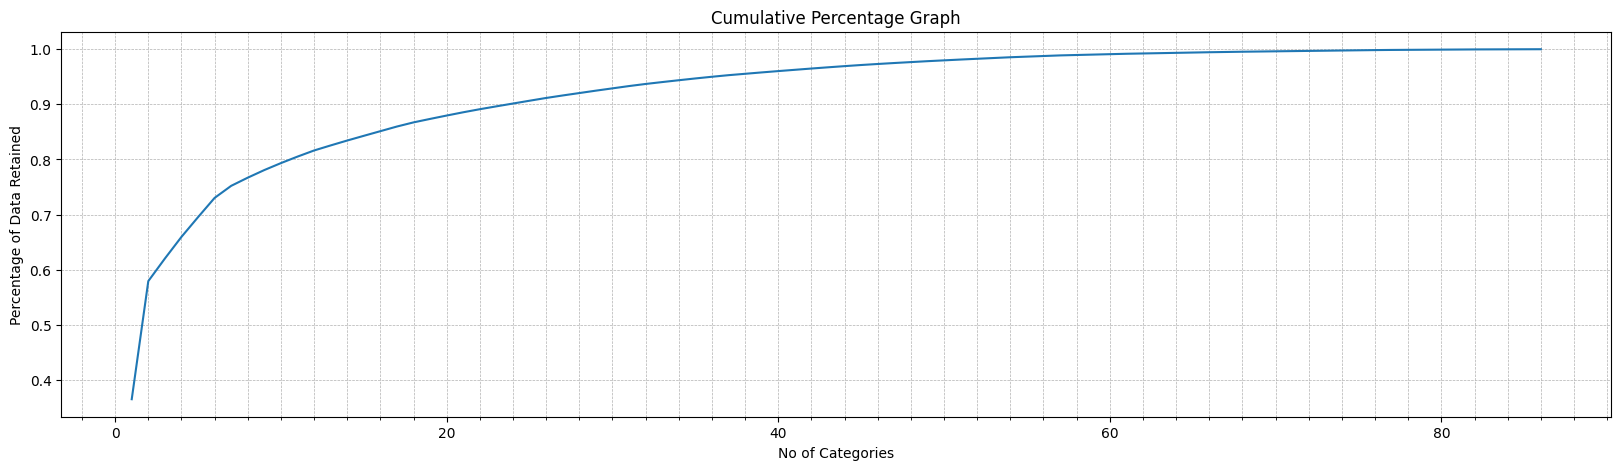

In [431]:
plt.figure(figsize=(20, 5))
plt.plot(indices, cumulative)
plt.title('Cumulative Percentage Graph')
plt.xlabel('No of Categories')
plt.ylabel('Percentage of Data Retained')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))  
plt.show()

In [432]:
df.head()

,Topic,Text,Category,Split,WordCount,TokenCount
0,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT,Mounting trade friction between the U.S. And ...,trade,test,706,809
1,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS,A survey of 19 provinces and seven cities sho...,grain,test,99,114
2,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWARDS,The Ministry of International Trade and Indus...,nat-gas,test,166,190
3,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER,Thailand's trade deficit widened to 4.5 billi...,rubber,test,141,158
4,INDONESIA SEES CPO PRICE RISING SHARPLY,Indonesia expects crude palm oil (CPO) prices...,palm-oil,test,152,171


In [433]:
df_training = df[df['Split'] == 'training']

In [434]:
df_training

,Topic,Text,Category,Split,WordCount,TokenCount
3019,BAHIA COCOA REVIEW,Showers continued throughout the week in the ...,cocoa,training,486,526
3020,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department reported the ...,sorghum,training,138,156
3021,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show crop regis...,wheat,training,186,268
3022,CHAMPION PRODUCTS &lt;CH> APPROVES STOCK SPLIT,Champion Products Inc said its board of direc...,earn,training,57,60
3023,COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES ...,Computer Terminal Systems Inc said it has com...,acq,training,207,236
...,...,...,...,...,...,...
10783,BANK OF JAPAN INTERVENES SOON AFTER TOKYO OPENING,The Bank of Japan bought a small amount of do...,money-fx,training,81,90
10784,JAPAN RUBBER STOCKS FALL IN MARCH,"Japan's rubber stocks fell to 44,980 tonnes i...",rubber,training,55,62
10785,SOUTH KOREAN WON FIXED AT 25-MONTH HIGH,THE BANK OF KOREA SAID IT FIXED THE MIDRATE O...,money-fx,training,54,61
10786,NIPPON MINING LOWERS COPPER PRICE,Nippon Mining Co Ltd said it lowered its sell...,copper,training,22,24


In [435]:
#retains 80% of data with 10 categories
selected_cats = df_training['Category'].value_counts().index.to_list()[:10]

In [436]:
selected_cats

['earn',
 'acq',
 'interest',
 'crude',
 'trade',
 'money-fx',
 'ship',
 'money-supply',
 'wheat',
 'sugar']

In [437]:
df_training_80 = df_training[df_training['Category'].isin(selected_cats)]

In [438]:
df_training_80

,Topic,Text,Category,Split,WordCount,TokenCount
3021,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show crop regis...,wheat,training,186,268
3022,CHAMPION PRODUCTS &lt;CH> APPROVES STOCK SPLIT,Champion Products Inc said its board of direc...,earn,training,57,60
3023,COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES ...,Computer Terminal Systems Inc said it has com...,acq,training,207,236
3024,COBANCO INC &lt;CBCO> YEAR NET,"Shr 34 cts vs 1.19 dlrs Net 807,000 vs 2,...",earn,training,50,54
3025,OHIO MATTRESS &lt;OMT> MAY HAVE LOWER 1ST QTR NET,"Ohio Mattress Co said its first quarter, endi...",acq,training,130,146
...,...,...,...,...,...,...
10780,POEHL WARNS AGAINST FURTHER DOLLAR FALL,Bundesbank President Karl Otto Poehl said a w...,money-supply,training,452,502
10782,Bank of Japan buys dollars shortly after openi...,Bank of Japan buys dollars shortly after open...,money-fx,training,14,14
10783,BANK OF JAPAN INTERVENES SOON AFTER TOKYO OPENING,The Bank of Japan bought a small amount of do...,money-fx,training,81,90
10785,SOUTH KOREAN WON FIXED AT 25-MONTH HIGH,THE BANK OF KOREA SAID IT FIXED THE MIDRATE O...,money-fx,training,54,61


In [439]:
df_training_80.to_csv("dataset_training.csv", sep=',', index=False, encoding='utf-8')

In [440]:
df_testing = df[df['Split'] == 'test']

In [441]:
df_testing_80 = df_testing[df_testing['Category'].isin(selected_cats)]

In [442]:
df_testing_80

,Topic,Text,Category,Split,WordCount,TokenCount
0,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT,Mounting trade friction between the U.S. And ...,trade,test,706,809
5,AUSTRALIAN FOREIGN SHIP BAN ENDS BUT NSW PORTS...,"Tug crews in New South Wales (NSW), Victoria ...",ship,test,194,217
7,SRI LANKA GETS USDA APPROVAL FOR WHEAT PRICE,Food Department officials said the U.S. Depar...,wheat,test,46,48
9,SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERGER,Sumitomo Bank Ltd &lt;SUMI.T> is certain to l...,acq,test,662,770
11,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TENDER,The Bundesbank accepted bids for 6.1 billion ...,interest,test,251,274
...,...,...,...,...,...,...
3009,PHILIPPINE TRADE GAP WIDENS IN JANUARY-AUGUST,The Philippines' trade deficit widened to 542...,trade,test,69,76
3010,NEW ZEALAND IMPOSES SANCTIONS AGAINST FIJI,New Zealand has imposed sanctions against Fij...,sugar,test,187,204
3012,"IRAN, SOVIET UNION TO SWAP CRUDE, REFINED PROD...",The Soviet Union has agreed to supply Iran wi...,crude,test,201,220
3014,N.Z.'S CHASE CORP MAKES OFFER FOR ENTREGROWTH,Chase Corp Ltd &lt;CHCA.WE> said it will make...,acq,test,193,217


In [443]:
df_testing_80.to_csv("dataset_testing.csv", sep=',', index=False, encoding='utf-8')